# PHYS 210, Homework 16
Due Monday, Nov 03, 2025 at the start of class on Canvas

## *1. Monte Carlo Error Propagation*

### 1.1 Intro and our initial example

Monte Carlo error propagation starts with the notion that one representation of a measurement uncertainty (aka measurement error) is that of a gaussian where the mean of the gaussian represents the measurand (the value) and the standard deviation represents the measurement error. 

For example, to determine the resistance ($R$) of a component in a noisy circuit, I can measure the voltage drop ($V$) across that component and the current ($I$) through that component.

As a reminder, when using the calculus method for error propagation for a function ($f$) determined from uncorrelated variables ($x_1, x_2, ...$), the error $df$ is given by:

$$f = f(x_1, x_2, ..),$$

$$df = \sqrt{\sum^N_{i=1} \left(dx_i\dfrac{\partial f}{\partial x_i}\right)^2}.$$

To find the erorr in the resistance, this would look like:

$$ R = \frac{V}{I},$$

$$ dR = \sqrt{\left(dV\dfrac{\partial R}{\partial V}\right)^2 + \left(dI\dfrac{\partial R}{\partial I}\right)^2},$$

$$ dR = \sqrt{\left(dV \cdot \dfrac{1}{I}\right)^2 + \left(dI\dfrac{V}{I^2}\right)^2},$$

$$ dR = R \sqrt{\left(\dfrac{dV}{V}\right)^2 + \left(\dfrac{dI}{I}\right)^2},$$

where the final step requires a little algegra and a substitution of $R=V/I$ back in. 

For this example let's say I measured the following values:
$$V=(1.52 \pm 0.11)\mbox{ V}, \mbox{ and}$$
$$I=(0.0642 \pm 0.0029)\mbox{ A}.$$

If you work through the arithmetic using the numbers given, you should get

$$R = (23.7 \pm 2.0)\, \Omega.$$

### 1.2 Graphical representations of uncertianties

Let's visualize what each of the quantities (V, I and R) would look like with this Gaussian representation of uncertainty.

<>:39: SyntaxWarning: invalid escape sequence '\O'
<>:39: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_11773/979836819.py:39: SyntaxWarning: invalid escape sequence '\O'
  axes[2].set_xlabel("Resistance ($\Omega$)")


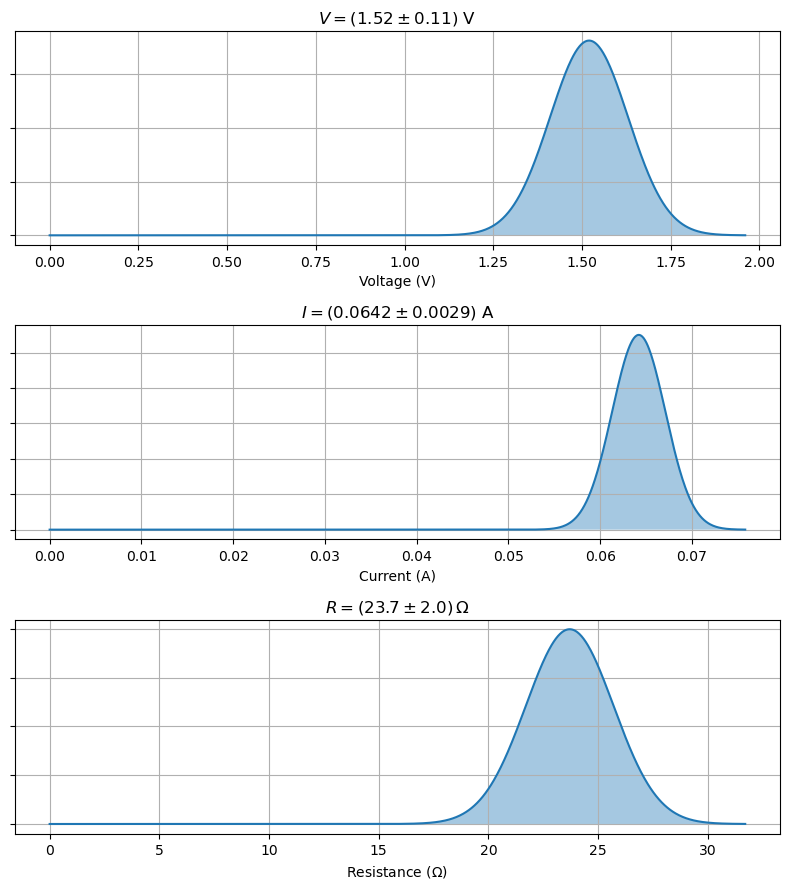

In [1]:
# Run me to generate graphical representations of these measurements

import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu) / sigma)**2)

# Given and calculated measurements
V, dV = 1.52, 0.11 # V
I, dI = 0.0642, 0.0029 # A
R, dR = 23.7, 2.0 # ohms

# Generate x and Gaussian y values
x_V = np.linspace(0, V + 4*dV, 1000)
x_I = np.linspace(0, I + 4*dI, 1000)
x_R = np.linspace(0, R + 4*dR, 1000)
y_V = gaussian(x_V, V, dV)
y_I = gaussian(x_I, I, dI)
y_R = gaussian(x_R, R, dR)

# Make our plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))

axes[0].plot(x_V, y_V)
axes[0].fill_between(x_V, y_V, alpha=0.4)
axes[0].set_title(f"$V = ({V} \\pm {dV})$ V")
axes[0].set_xlabel("Voltage (V)")

axes[1].plot(x_I, y_I)
axes[1].fill_between(x_I, y_I, alpha=0.4)
axes[1].set_title(f"$I = ({I} \\pm {dI})$ A")
axes[1].set_xlabel("Current (A)")

axes[2].plot(x_R, y_R)
axes[2].fill_between(x_R, y_R, alpha=0.4)
axes[2].set_title(f"$R = ({R} \\pm {dR})\\,\\Omega$ ")
axes[2].set_xlabel("Resistance ($\Omega$)")

for ax in axes:
    ax.set_yticklabels([])
    ax.grid(True)   

plt.tight_layout()
plt.show()


### 1.3 Using Monte Carlo to generate data drawn from our Gaussian distributions

Instead of using our calculus method to derive $\delta R$, we could use a Monte-Carlo approach. In this approach, we generate $V$ and $I$ data as Monte Carlo events drawn from the above Gaussian distributions. And then for each pair of generated $V$ and $I$ events, we calculate $R$. The mean and standard devation of this $R$ distribution should then be $R \pm dR$, respectively:

$$R_{\mbox{Monte Carlo}} = \frac{V_{\mbox{Monte Carlo}}}{I_{\mbox{Monte Carlo}}}.$$

Note that we are using only 5000 data points here so that the graphs below show our Monte Carlo data clearly. However, it would be reasonable to make `N` as high as one million (1,000,000) to make this quite accurate.

We generate these results in the code block below, and then in the next section we plot them.

In [2]:
N = int(5e6)

# Draw random samples from Gaussian distributions for V and R
V_samples = np.random.normal(V, dV, N)
I_samples = np.random.normal(I, dI, N)

# Calculate R for each pair of V and I samples
R_samples = V_samples / I_samples 

# Compute mean and standard deviation of the R samples
R_mc = np.mean(R_samples)
dR_mc = np.std(R_samples, ddof=1)

print(f"Monte Carlo R = {R_mc:.1f} ± {dR_mc:.1f} ohms")

Monte Carlo R = 23.7 ± 2.0 ohms


### 1.4 Visualizing the Monte Carlo results

Let's add these Monte Carlo data to our previous plots. Recall that we are sampling our $V$ and our $I$ distibutions and then from each pair determing $R_{\mbox{Monte Carlo}}$. 

Thus, in the plot for $R$, the expected cureve that is shown is based on our traditional uncertainty propragation rules, but our Monte Carlo data in this plot does not come from sampling this $R$ distribution, but instead comes from those Monte Carlo $V$ and $I$ events:

$$R_{\mbox{Monte Carlo}} = \frac{V_{\mbox{Monte Carlo}}}{I_{\mbox{Monte Carlo}}}.$$

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\,'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\,'
<>:26: SyntaxWarning: invalid escape sequence '\O'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\,'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\,'
<>:26: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_11773/2734995134.py:11: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_title(f"$V = ({V} \pm {dV})$ V")
/tmp/ipykernel_11773/2734995134.py:18: SyntaxWarning: invalid escape sequence '\p'
  axes[1].set_title(f"$I = ({I} \pm {dI})$ A")
/tmp/ipykernel_11773/27349

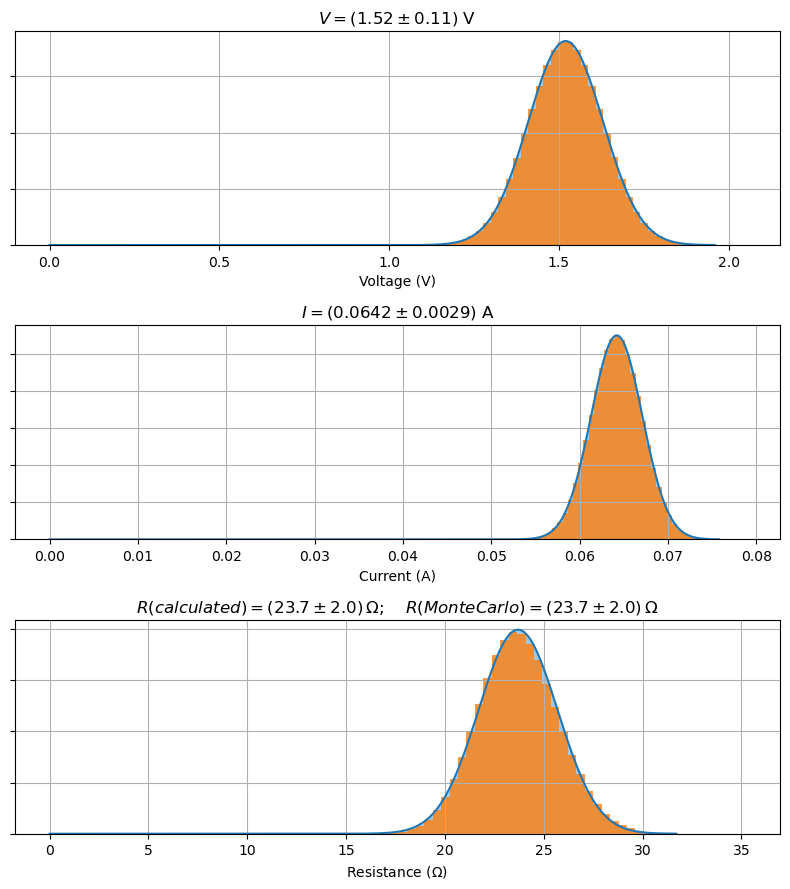

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Make our plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))

# Plot Gaussian and histogram for V
axes[0].plot(x_V, y_V)
axes[0].fill_between(x_V, y_V, alpha=0.4)
axes[0].hist(V_samples, bins=50, density=True, alpha=0.8)
axes[0].set_title(f"$V = ({V} \pm {dV})$ V")
axes[0].set_xlabel("Voltage (V)")

# Plot Gaussian and histogram for I
axes[1].plot(x_I, y_I)
axes[1].fill_between(x_I, y_I, alpha=0.4)
axes[1].hist(I_samples, bins=50, density=True, alpha=0.8)
axes[1].set_title(f"$I = ({I} \pm {dI})$ A")
axes[1].set_xlabel("Current (A)")

# Plot Gaussian and histogram for R
axes[2].plot(x_R, y_R)
axes[2].fill_between(x_R, y_R, alpha=0.4)
axes[2].hist(R_samples, bins=50, density=True, alpha=0.8)
axes[2].set_title(f"$R(calculated) = ({R} \pm {dR})\,\Omega$;    $R(Monte Carlo) = ({R_mc:.1f} \pm {dR_mc:.1f})\,\Omega$ ")
axes[2].set_xlabel("Resistance ($\Omega$)")

for ax in axes:
    ax.set_yticklabels([])
    ax.grid(True)

plt.tight_layout()
plt.show()

### Your turn #1

Try some values of $N$ ranging from 5,000 to 1,000,000 and see how this affects the figures in Section 1.4.

### Your turn #2

**Verify that Monte Carlo error propagation gives a consistent result $dz$ to that from the calculus method of error progagation for the following situation.**

Population growth $z$ is predicted by a combination of available resources $x$ and a predator-prey relationship $y$ as given by the following expression:

$$ z = \ln x + y^2.$$

Using the calculus method for error derivation, we would find that the uncertainty in this population growth is given by

$$ dz = \sqrt{\left(\frac{dx}{x}\right)^2 + (2\,y\,dy)^2}.$$

For the following values, use Monte Carlo error propagation to show that you get the same $dz$ as we get from the direct calculation:

* $x = 2.03 \pm 0.15$,
* $y = 0.679 \pm 0.052$.

In [4]:
# Code to find the directly calculated values

x_val, dx_val = 2.03, 0.15
y_val, dy_val = 0.679, 0.052

z_calc = np.log(x_val) + y_val**2
dz_calc = np.sqrt((dx_val/x_val)**2 + (2*dy_val*y_val)**2)

print(f"Calculated z = {z_calc:.2f} ± {dz_calc:.2f}")

Calculated z = 1.17 ± 0.10


In [5]:
# Your code for Monte Carlo error propagation

N = 1000000

# Draw random samples from Gaussian distributions for V and R
X_samples = np.random.normal(x_val, dx_val, N)
Y_samples = np.random.normal(y_val, dy_val, N)

# Calculate R for each pair of V and I samples
Z_samples = np.log(X_samples) + Y_samples ** 2

# Compute mean and standard deviation of the R samples
Z_mc = np.mean(Z_samples)
dZ_mc = np.std(Z_samples, ddof=1)

print(f"Monte Carlo R = {Z_mc:.1f} ± {dZ_mc:.1f} ohms")

Monte Carlo R = 1.2 ± 0.1 ohms


### Your turn #3
Generate a series of plots in the style of Section 1.4 (Monte Carlo data histograms with Gaussians representing the expected distributions) to visualize your results for Your turn #2.

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_11773/2982040534.py:21: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_title(f"$X = ({x_val} \pm {dx_val})$")
/tmp/ipykernel_11773/2982040534.py:28: SyntaxWarning: invalid escape sequence '\p'
  axes[1].set_title(f"$Y = ({y_val} \pm {dy_val})$")
/tmp/ipykernel_11773/2982040534.py:35: SyntaxWarning: invalid escape sequence '\p'
  axes[2].set_title(f"$Z = ({z_calc:.1f} \pm {dz_calc:.1f}); $R(Monte Carlo) = ({Z_mc:.1f} \pm {dZ_mc:.1f})$")
/tmp/ipykernel_11773/2982040534.py:35: SyntaxWarning: invalid escape sequence '\p'
  axes[2].set_title(f"$Z = ({z_calc:.1f} \p

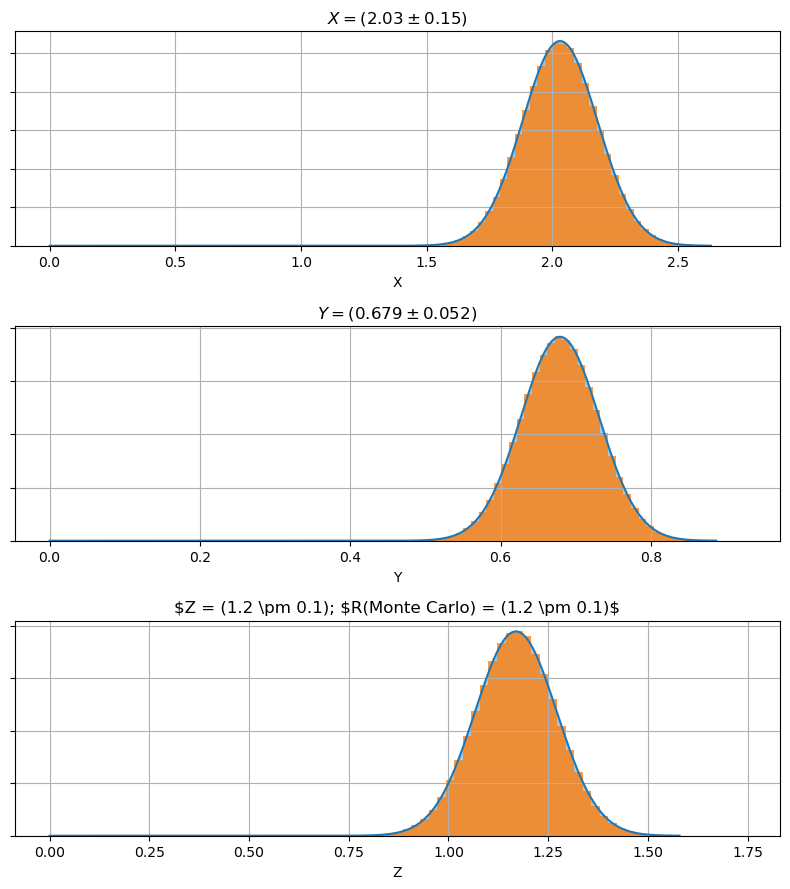

In [6]:
# Your plotting code 

# Generate x and Gaussian y values
x_X = np.linspace(0, x_val + 4*dx_val, 1000)
x_Y = np.linspace(0, y_val + 4*dy_val, 1000)
x_Z = np.linspace(0, Z_mc  + 4*dZ_mc, 1000)
y_X = gaussian(x_X, x_val, dx_val)
y_Y = gaussian(x_Y, y_val, dy_val)
y_Z = gaussian(x_Z, Z_mc,  dZ_mc)

import numpy as np
import matplotlib.pyplot as plt

# Make our plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))

# Plot Gaussian and histogram for V
axes[0].plot(x_X, y_X)
axes[0].fill_between(x_X, y_X, alpha=0.4)
axes[0].hist(X_samples, bins=50, density=True, alpha=0.8)
axes[0].set_title(f"$X = ({x_val} \pm {dx_val})$")
axes[0].set_xlabel("X")

# Plot Gaussian and histogram for I
axes[1].plot(x_Y, y_Y)
axes[1].fill_between(x_Y, y_Y, alpha=0.4)
axes[1].hist(Y_samples, bins=50, density=True, alpha=0.8)
axes[1].set_title(f"$Y = ({y_val} \pm {dy_val})$")
axes[1].set_xlabel("Y")

# Plot Gaussian and histogram for R
axes[2].plot(x_Z, y_Z)
axes[2].fill_between(x_Z, y_Z, alpha=0.4)
axes[2].hist(Z_samples, bins=50, density=True, alpha=0.8)
axes[2].set_title(f"$Z = ({z_calc:.1f} \pm {dz_calc:.1f}); $R(Monte Carlo) = ({Z_mc:.1f} \pm {dZ_mc:.1f})$")
axes[2].set_xlabel("Z")

for ax in axes:
    ax.set_yticklabels([])
    ax.grid(True)

plt.tight_layout()
plt.show()

## *Completing this solo worksheet and submitting it to Canvas*
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded to the appropriate Solo Worksheet submission on Canvas.

In [7]:
print("The notebook ran without errors")

The notebook ran without errors
